# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [4]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [5]:
#On importe les données dans un dataframe
df_hip=pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")
df_hip.head(5)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [6]:
#On vérifie que le type des données attribué par pandas est cohérent
print ("La nature des données par colonne est")
df_hip.dtypes


La nature des données par colonne est


date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

In [7]:
#On peut également utiliser
df_hip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [8]:
print('Les différents types de biens immobiliers contenus dans notre dataset sont:')
df_hip[['code_type_local','type_local']].drop_duplicates()

Les différents types de biens immobiliers contenus dans notre dataset sont:


,code_type_local,type_local
0,2,Appartement
18,4,Local industriel. commercial ou assimilé


On observe qu'il y a deux (02) types de biens immobiliers ayant chacun son propre code:

1- Les appartements: sont référencés sous le code 2

2- Les locaux industriels, commerciaux et assimilés: sont référencés sous le code 4
 

### 3. Nombre de transactions

In [9]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print(f"le nombre de transactions dans les données est {df_hip.shape[0]}" "\n -------------------------------------- \n")
print(f"le nombre de transactions pour les appartements dans les données est {(df_hip.loc[df_hip['code_type_local'] == 2]).value_counts().sum()}" "\n -------------------------------------- \n")
print(f"le nombre de transactions pour les locaux commerciaux dans les données est {(df_hip.loc[df_hip['code_type_local'] == 4]).value_counts().sum()}")

le nombre de transactions dans les données est 26196
 -------------------------------------- 

le nombre de transactions pour les appartements dans les données est 24353
 -------------------------------------- 

le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [10]:
#On vérifie également la plage de l'historique disponible
print(f"la première date de transaction dans les données est le {df_hip['date_mutation'].min()}" "\n -------------------------------------- \n")
print(f"la dernière date de transaction dans les données est le {df_hip['date_mutation'].max()}"  "\n -------------------------------------- \n")

la première date de transaction dans les données est le 2017-01-02 00:00:00
 -------------------------------------- 

la dernière date de transaction dans les données est le 2021-12-31 00:00:00
 -------------------------------------- 



## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [11]:
# Calcul de la colonne du prix du mètre carré
df_hip["prix_metre_carre"]=df_hip["valeur_fonciere"]/df_hip["surface_reelle"]
df_hip

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.781918
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.536370
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.765753
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.182877


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [12]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appartements=df_hip.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[df_hip['code_type_local']==2]
df_appartements['annee'] = df_appartements['date_mutation'].dt.year
df_appartements.head(5)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_metre_carre,annee
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562,2017
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877,2017
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548,2017
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877,2017
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836,2017


In [13]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df1=df_appartements[['prix_metre_carre','surface_reelle']].groupby(df_appartements.date_mutation.dt.year).mean()
df1 = df1.rename(columns={'prix_metre_carre': 'moyenne_prix_metre_carre'})
df1 = df1.rename(columns={'surface_reelle': 'moyenne_surface_reelle'})
df1


,moyenne_prix_metre_carre,moyenne_surface_reelle
date_mutation,,
2017,9492.859195,44.627737
2018,10031.403432,44.271671
2019,10562.712581,43.361645
2020,10674.872650,42.900654
2021,10455.600126,43.479864


On constate dans un premier temps que la moyenne des prix de vente des appartements à Paris a enregistré une hausse constante depuis 2017 jusqu'à 
2020.

Puis dans un deuxième temps cette moyenne de prix de vente connaît une baisse depuis 2021.

Nous allons créer un graphique pour mieux le visualiser.

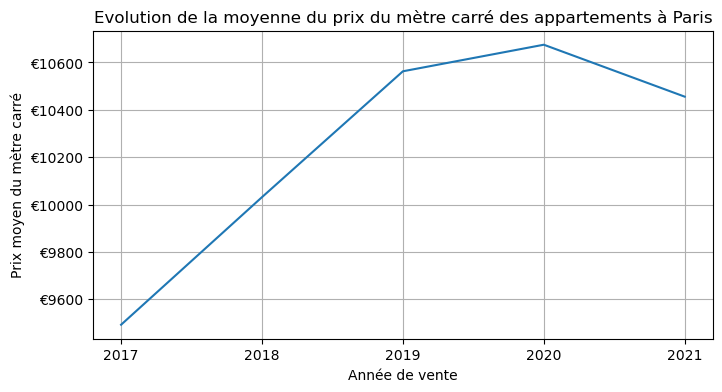

In [14]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(8,4))
plt.plot(['2017','2018','2019','2020','2021'],df1['moyenne_prix_metre_carre'])
plt.xlabel("Année de vente")
plt.ylabel("Prix moyen du mètre carré")
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title("Evolution de la moyenne du prix du mètre carré des appartements à Paris")
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [15]:
#Liste des codes postaux dans nos données.
(df_appartements['code_postal']).unique()
print (f"La liste des codes postaux de Paris est: {df_appartements['code_postal'].unique()}")
    

La liste des codes postaux de Paris est: [75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [16]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df2=df_appartements[['prix_metre_carre','code_postal']].groupby([df_appartements.date_mutation.dt.year,'code_postal'],as_index=False).mean()
df2 = df2.rename(columns={'prix_metre_carre': 'moyenne_prix_metre_carre_appartements'})
df2 = df2.rename(columns={'date_mutation': 'annee_mutation'})
df2

,code_postal,moyenne_prix_metre_carre_appartements
0,75001,11762.706289
1,75002,10920.126562
2,75003,11679.818729
3,75004,12407.227522
4,75005,11306.752404
...,...,...
95,75016,10790.307817
96,75017,10372.368746
97,75018,9665.640629
98,75019,8828.586057


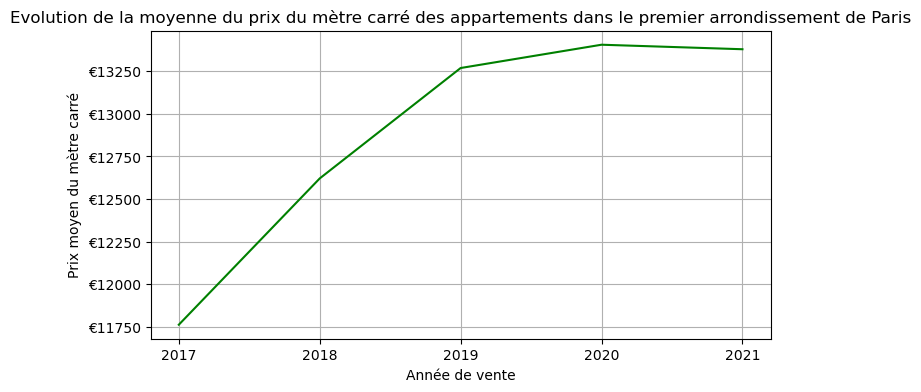

In [17]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(8,4))
plt.plot(['2017','2018','2019','2020','2021'],df2.loc[df2['code_postal']==75001]['moyenne_prix_metre_carre_appartements'],color='green')
plt.xlabel("Année de vente")
plt.ylabel("Prix moyen du mètre carré")
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title("Evolution de la moyenne du prix du mètre carré des appartements dans le premier arrondissement de Paris")
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

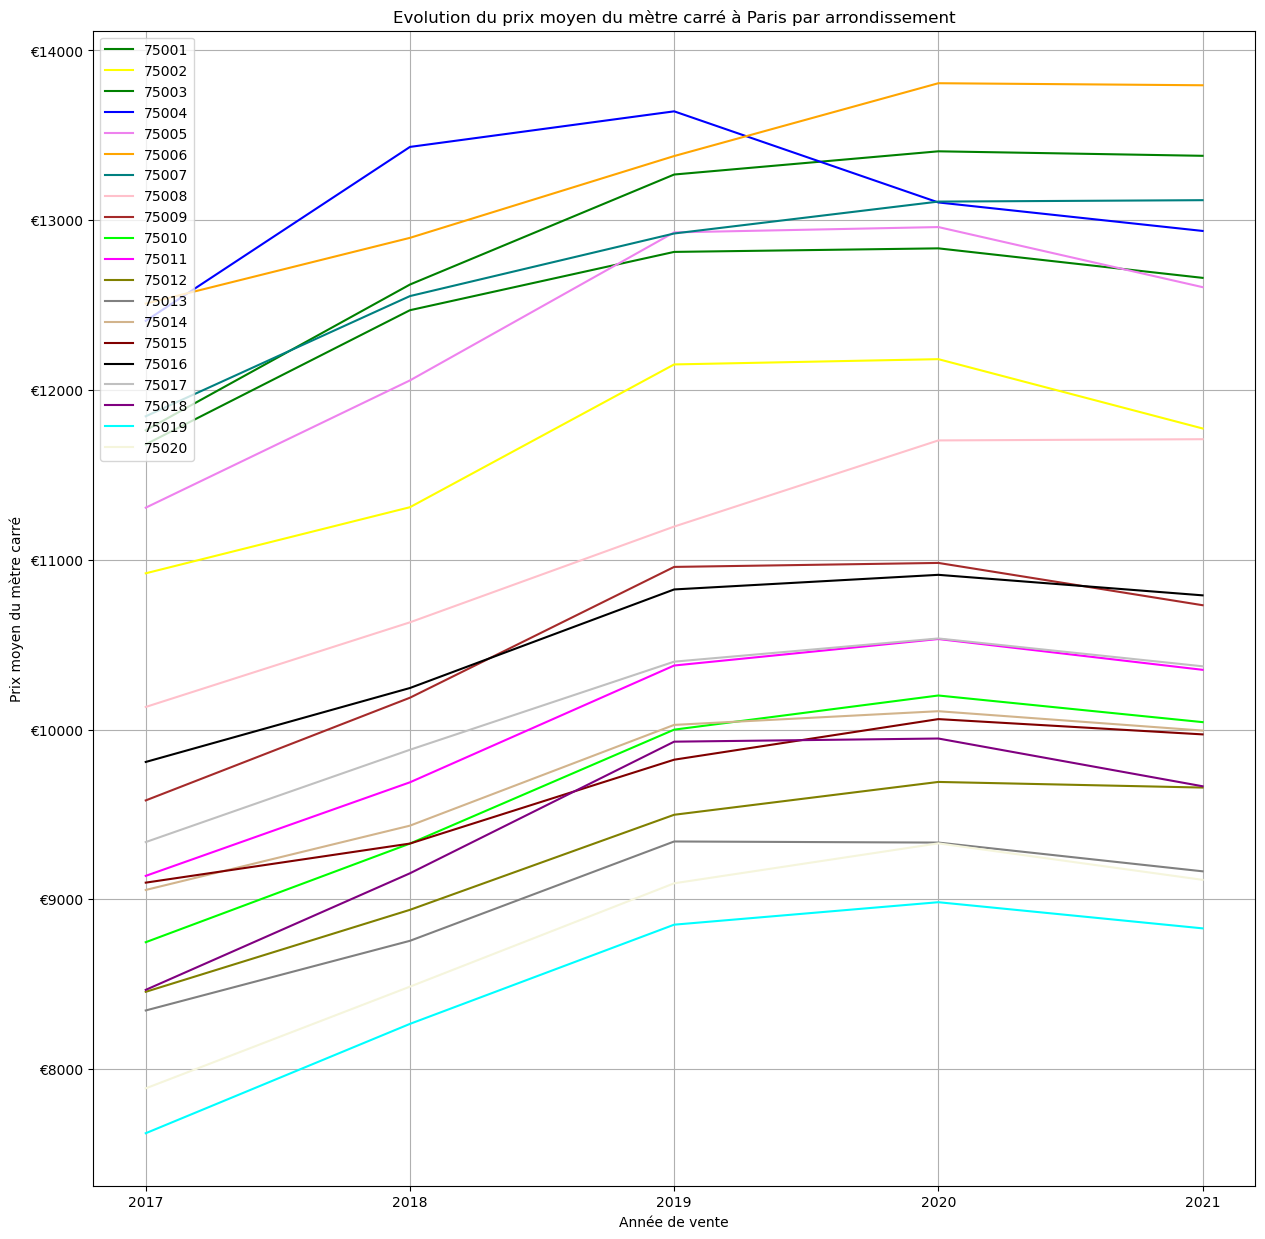

In [18]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
plt.plot(interval_historique,df2.loc[df2['code_postal']==75001]['moyenne_prix_metre_carre_appartements'], color='green',label='75001')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75002]['moyenne_prix_metre_carre_appartements'], color='yellow',label='75002')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75003]['moyenne_prix_metre_carre_appartements'], color='green',label='75003')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75004]['moyenne_prix_metre_carre_appartements'], color='blue',label='75004')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75005]['moyenne_prix_metre_carre_appartements'], color='violet',label='75005')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75006]['moyenne_prix_metre_carre_appartements'], color='orange',label='75006')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75007]['moyenne_prix_metre_carre_appartements'], color='teal',label='75007')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75008]['moyenne_prix_metre_carre_appartements'], color='pink',label='75008')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75009]['moyenne_prix_metre_carre_appartements'], color='brown',label='75009')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75010]['moyenne_prix_metre_carre_appartements'], color='lime',label='75010')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75011]['moyenne_prix_metre_carre_appartements'], color='magenta',label='75011')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75012]['moyenne_prix_metre_carre_appartements'], color='olive',label='75012')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75013]['moyenne_prix_metre_carre_appartements'], color='gray',label='75013')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75014]['moyenne_prix_metre_carre_appartements'], color='tan',label='75014')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75015]['moyenne_prix_metre_carre_appartements'], color='maroon',label='75015')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75016]['moyenne_prix_metre_carre_appartements'], color='black',label='75016')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75017]['moyenne_prix_metre_carre_appartements'], color='silver',label='75017')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75018]['moyenne_prix_metre_carre_appartements'], color='purple',label='75018')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75019]['moyenne_prix_metre_carre_appartements'], color='cyan',label='75019')
plt.plot(interval_historique,df2.loc[df2['code_postal']==75020]['moyenne_prix_metre_carre_appartements'], color='beige',label='75020')
plt.xlabel('Année de vente')
plt.ylabel('Prix moyen du mètre carré')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix moyen du mètre carré à Paris par arrondissement')
plt.legend(loc='upper left')
plt.show()

Ce visuel nous permet de relever les observations suivantes: 

* Jusqu'à 2020 et de manière générale on constate une hausse continue des moyennes du prix du mètre carré dans tous les arrondissements confondus.

* Présence de disparités importantes dans les moyennes du prix du mètre carré d'un arrondissement à un autre.

* A partir de 2020 et de manière générale on constate une baisse des moyennes du prix du mètre carré dans certains arrondissements et une stabilisation dans d'autres

* Le prix moyen du mètre carré est le plus bas dans le 19ème arrondissement et le plus élevé dans le 6ème arrondissement


In [19]:
#Observons les prix pour 2021 pour vérifier cette différence de prix
df3=df_appartements[['prix_metre_carre','code_postal']].groupby([df_appartements.date_mutation.dt.year==2021,'code_postal'],as_index=False).mean()
df3=df3.rename(columns = {'prix_metre_carre':'moyenne_prix_metre_carre_appartements'})
df3.tail(20).sort_values(by='moyenne_prix_metre_carre_appartements', ascending=False)


,code_postal,moyenne_prix_metre_carre_appartements
25,75006,13795.048958
20,75001,13379.498578
26,75007,13118.135985
23,75004,12936.958334
22,75003,12660.546567
24,75005,12605.843983
21,75002,11773.445419
27,75008,11710.094574
35,75016,10790.307817
28,75009,10732.184387


### 7. Prix au metre carré par transaction dans un arrondissement

In [20]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
(df_appartements.loc[df_appartements['code_postal'] == 75006]).value_counts().sum()
print (f"Le nombre de transactions effectuées dans le 6ème arrondissement de Paris est: {df_appartements.loc[df_appartements['code_postal'] == 75006].value_counts().sum()}")


Le nombre de transactions effectuées dans le 6ème arrondissement de Paris est: 709


* On retrouve un total de 709 transactions dans le 6ème arrondissement sur la base duquel le prix moyen du mètre carré a été calculé.Pour le moment rien d'incohérent.

Affichons l'historique des transactions pour visualiser la dispersion des données :

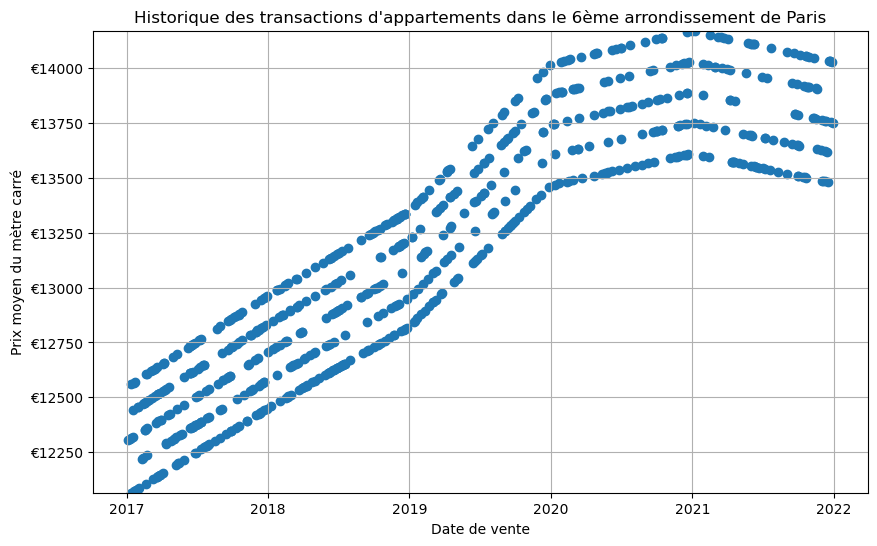

In [21]:
code_postal =75006
plt.figure(figsize=(10,6))
#Insérer ci-dessous le scatter plot
plt.scatter(df_appartements.loc[df_appartements['code_postal']==code_postal]['date_mutation'],df_appartements.loc[df_appartements['code_postal']==code_postal]['prix_metre_carre'])
plt.xlabel('Date de vente')
plt.ylabel('Prix moyen du mètre carré')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(df_appartements.loc[df_appartements['code_postal']==code_postal]['prix_metre_carre'].min(),df_appartements.loc[df_appartements['code_postal']==code_postal]['prix_metre_carre'].max())
plt.grid(which='both')
plt.title("Historique des transactions d'appartements dans le 6ème arrondissement de Paris")
plt.show()

On observe qu'il y a une distribution cohérente tout autour de la moyenne du prix du mètre carré ainsi qu'une dispersion des données qui ne fait pas ressortir de valeurs abbérantes.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [22]:
#On calcule la corrélation de Spearman
from scipy import stats
stats.pearsonr((df_appartements.loc[df_appartements['code_postal']==75006]['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9), df_appartements.loc[df_appartements['code_postal']==75006]['prix_metre_carre'])

PearsonRResult(statistic=0.903844603149148, pvalue=7.108378962572106e-263)

Ce calcul permet de mesurer le sens et la force de l'association entre la variable du prix moyen du mètre carré et celle de la date de vente pour les appartements situés dans le 6ème arrondissement. Ce calcul permet aussi de déterminer le degrés de significativité des résultats.
Le coefficient étant de 0,90 nous sommes en mesure d'établir l'existence d'une corrélation positive entre les deux variables.
Par ailleurs, la pvalue étant très inférieure au seuil de significativité alpha de 0,05 le résultat est donc significatif. Il y a moins de 5% de risque que le résultat soit dû à des aléas ou au hasard.


### 9. Vérification de la relation entre la valeur fonciere et la surface

In [23]:
stats.pearsonr(df_appartements.loc[df_appartements['code_postal']==75006]['surface_reelle'],df_appartements.loc[df_appartements['code_postal']==75006]['valeur_fonciere'])

PearsonRResult(statistic=0.9977572898250295, pvalue=0.0)

Ce calcul permet de mesurer le sens et la force de l'association entre la variable de la valeur foncière et celle de la surface de l'appartement. Ce calcul permet aussi de déterminer le degrés de significativité des résultats.

Le coefficient étant de 0,99 nous sommes en mesure d'établir l'existence d'une forte corrélation positive entre les deux variables.

Par ailleurs, la pvalue étant de 0 le résultat est donc significatif. Il y a moins de 5% de risque que le résultat soit dû à des aléas ou au hasard.


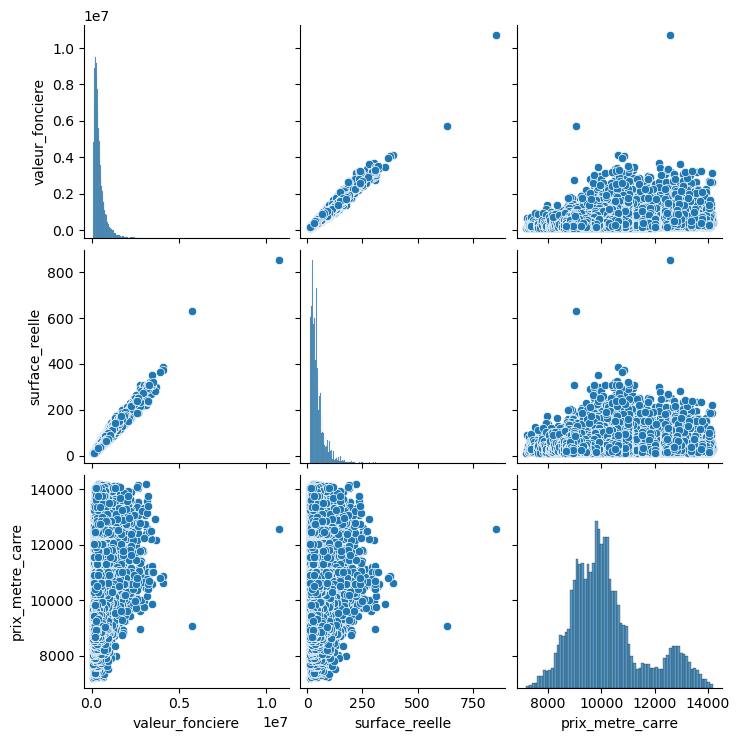

In [24]:
#Visualisation des relations grâce à des graphiques statistiques
import seaborn as sns 
df_appartements_seaborn = df_appartements.drop(columns=['code_postal','annee'])
sns.pairplot(df_appartements_seaborn)


Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [25]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux=df_hip.drop(columns=['adresse_numero','adresse_nom_voie','nom_commune'])[df_hip['code_type_local']==4]
df_locaux['prix_metre_carre']=df_locaux['valeur_fonciere']/df_locaux['surface_reelle']
df_locaux.head(5)

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_metre_carre
18,2017-02-01,3.113277e+06,75003,4,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,4,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,4,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,4,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,4,Local industriel. commercial ou assimilé,25,12636.289027


In [26]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année 


df4=df_locaux[['date_mutation','prix_metre_carre']].groupby(df_locaux.date_mutation.dt.year).mean(numeric_only=True)
df4=df4.rename(columns = {'prix_metre_carre':'moyenne_prix_metre_carre_locaux'})

df5=df_appartements[['date_mutation','prix_metre_carre']].groupby(df_appartements.date_mutation.dt.year).mean(numeric_only=True)
df5=df5.rename(columns = {'prix_metre_carre':'moyenne_prix_metre_carre_appartements'})


In [27]:
#Imprimer le nouveau fichier des locaux regroupant le prix moyen du mètre carré par année
df4

,moyenne_prix_metre_carre_locaux
date_mutation,
2017,10949.909217
2018,11569.499180
2019,11960.132050
2020,11966.470204
2021,12006.488691


In [28]:
#Imprimer le nouveau fichier des appartements regroupant le prix moyen du mètre carré par année
df5


,moyenne_prix_metre_carre_appartements
date_mutation,
2017,9492.859195
2018,10031.403432
2019,10562.712581
2020,10674.872650
2021,10455.600126


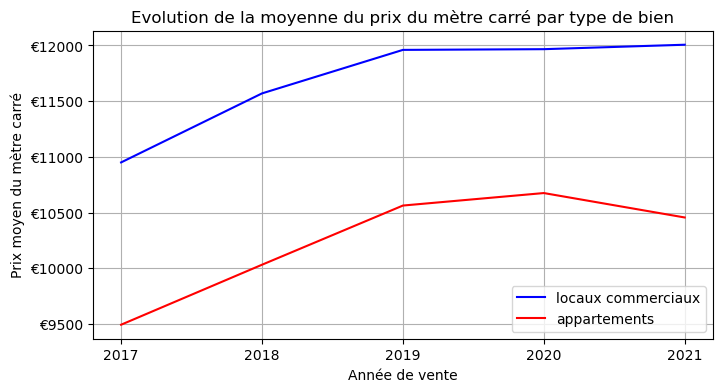

In [29]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(8,4))
plt.plot(['2017','2018','2019','2020','2021'],df4['moyenne_prix_metre_carre_locaux'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df5['moyenne_prix_metre_carre_appartements'],label='appartements',color='red')
plt.xlabel('Année de vente')
plt.ylabel('Prix moyen du mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution de la moyenne du prix du mètre carré par type de bien')
plt.show()

Le prix du metre carré des locaux commerciaux est supérieur à celui des appartements.

Les deux types de locaux ont vu une hausse des prix jusqu'en 2019. Ensuite, le prix s'est pratiquement stabilisé pour les locaux commerciaux. Mais pour ce qui est des appartements il a continué sa hausse jusqu'en 2020 puis a baissé à partir de là.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 

- la surface du bien immobilier: Quand la surface réelle augmente le prix du mètre carré augmente également.

- la date considérée: Quand la date est récente plus le prix du mètre carré est élevé.

- la localisation (code_postal): Il ya des arrondissements qui sont mieux quottés que d'autres et par conséquent le prix du mètre carré y est plus élevé. 

- le type de bien: Le prix du mètre carré des locaux commerciaux est plus élevé que celui des appartements. 

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [30]:
#Il permet d'éviter les biais dans le traitement des variables en considérant chaque valeur de manière égale; Cette méthode d'encodage peut travailler avec des variables comprenant un grand nombre de catégories
df_hip_encode=df_hip.join(pd.get_dummies(df_hip['code_postal']))
df_hip_encode=df_hip_encode.join(pd.get_dummies(df_hip['type_local']))
df_hip_encode['timestamp']=df_hip['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_hip_encode.drop(['date_mutation','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_metre_carre'],axis='columns',inplace=True)
df_hip_encode.head(5)

,valeur_fonciere,code_postal,surface_reelle,75001,75002,75003,75004,75005,75006,75007,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,5.505597e+05,75003,50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,1.576492e+06,75008,163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,6.577574e+05,75008,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,2.500868e+05,75003,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,1.762667e+05,75001,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [31]:
# On importe le train test split de la librairie sk_learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [32]:
#Définition des tableaux de données X et Y
X=df_hip_encode[['surface_reelle',75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,'Appartement','Local industriel. commercial ou assimilé','timestamp']]
Y=df_hip_encode['valeur_fonciere']

In [33]:
# Répartir nos données en deux parties: 33% pour le test et 67% pour l'entrainement et random state
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state = 6)

In [34]:
#Créer le modèle de régression linéaire
regress = LinearRegression()

In [35]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [36]:

#Entraîner le modèle de régression linéaire
regress.fit(X_train,Y_train)

LinearRegression()

In [37]:
#Calculer l'intercept et le coeffcient
print (regress.intercept_)
print ('-------------------------------')
print (regress.coef_)


-650509.2087413471
-------------------------------
[ 1.04141766e+04  1.01405377e+05  3.66489161e+04  7.14889554e+04
  1.09417991e+05  5.01378979e+04  1.38497535e+05  1.18321873e+05
  4.18356286e+04 -1.90438835e+04 -5.64625804e+04 -3.86161297e+04
 -7.20779719e+04 -7.67837920e+04 -5.39428657e+04 -5.48941319e+04
 -1.22181234e+04 -3.72426229e+04 -5.94239207e+04 -1.01611656e+05
 -8.54364947e+04 -4.58111096e+04  4.58111096e+04  4.59284788e-04]


In [38]:
#Effectuer des prédictions grâce au modèle mis en place
Y_predictions= regress.predict(X_test)
Y_predictions

array([ 392211.57591082,  473265.03562935,  740301.06682918, ...,
        560157.14512652,  326901.4488645 , 1689517.32771937])

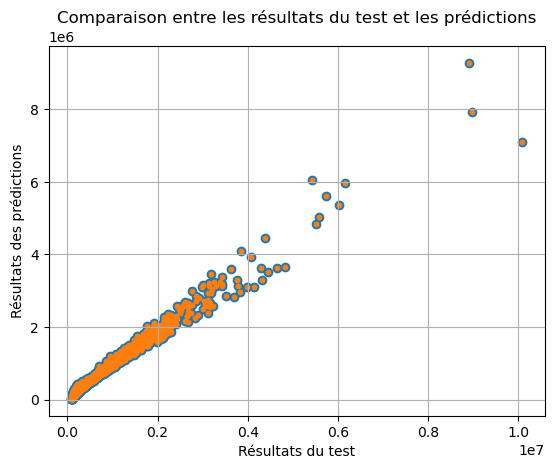

In [39]:
#Créer un grapgique pour comparer les résultats des prédictions avec ceux du test
plt.scatter(Y_test, Y_predictions)
colorL=np.array(['green','blue'])
plt.scatter(Y_test, Y_predictions,s=10)
plt.xlabel('Résultats du test')
plt.ylabel('Résultats des prédictions')
plt.grid()
plt.title('Comparaison entre les résultats du test et les prédictions')
plt.show()

In [40]:
#Les évaluations métriques permettent de mesurer la qualité de l'ajustement du modèle de régression aux données et ce en utilisant le coefficient de détermination (R²)
from sklearn import metrics
print('R²:',metrics.r2_score(Y_test,Y_predictions))
#Le résultat de notre R² se rapproche de 1 donc notre modèle possède un bon ajustement aux données. Il arrive à prédire de manière assez précise les valeurs observées. 

R²: 0.9770623400832106


In [41]:
#Ce code calcule le pourcentage d'erreur entre les valeurs Y_test et les valeurs prédites Y_predictions_lin en utilisant
#Cela permet d'évaluer la précision du modèle de régression linéaire en termes de prédiction des valeurs de Y_test.
Y_predictions_lin=regress.predict(X_test)
(np.mean(abs(Y_test-Y_predictions_lin)/Y_test))*100


8.930168245767641

Notre algorithme fait donc 8,9% d'erreur en moyenne sur la prédiction de la valeur foncière. C'est avec le random state 6 qu'on obtient le taux d'erreur le plus bas. 

Observations, conclusions et axes d'améliorations:

- Il en ressort des résultats que la variable du code postal ne suffit pas à elle seule pour avoir des prédictions pertinentes, il serait intéressant de voir des critères tels que l'attractivité du quartier car certains sont mieux quottés que d'autres, mais aussi, la nature du local (neuf ou ancien).



# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [42]:
#On importe les données dans un dataframe
actifs = pd.read_excel ('portefeuille_actifs.xlsx')
actifs.tail(10)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
265,16,PAS CARDINET,75017,75117,Paris 17e Arrondissement,21.16,4,Local industriel. commercial ou assimilé,28,0,2.311629,48.886148
266,3,RUE DES ABBESSES,75018,75118,Paris 18e Arrondissement,99.19,4,Local industriel. commercial ou assimilé,101,0,2.339175,48.883638
267,1,RUE ORDENER,75018,75118,Paris 18e Arrondissement,54.42,4,Local industriel. commercial ou assimilé,55,0,2.359457,48.890117
268,16,QUAI DE LA MARNE,75019,75119,Paris 19e Arrondissement,21.15,4,Local industriel. commercial ou assimilé,23,0,2.381972,48.889029
269,142,AV JEAN JAURES,75019,75119,Paris 19e Arrondissement,83.12,4,Local industriel. commercial ou assimilé,85,0,2.386551,48.886777
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784
274,16,RUE AUBRIOT,75004,75104,Paris 4e Arrondissement,20.40,4,Local industriel. commercial ou assimilé,37,0,2.357412,48.858715


In [43]:
#Identifier la nature des données 
actifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [44]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
actifs_encode=actifs.join(pd.get_dummies(actifs['code_postal']))
actifs_encode=actifs_encode.join(pd.get_dummies(actifs['type_local']))


In [45]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

actifs_encode['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())
actifs_encode.drop(['code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
actifs_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
actifs_encode.head(10)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
5,35,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
6,24,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
7,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
8,11,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1672441200
9,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1672441200


In [46]:
#Conversion du dataframe en str
actifs_encode.columns =actifs_encode.columns.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [47]:
#On effectue la prédiction
Y_predictions_last=regress.predict(actifs_encode)

#On vérifie les 10 premières valeurs
Y_predictions_last[:10]


array([433566.27593784, 372407.3242292 , 820216.91943322, 884291.18232519,
       342753.9974273 , 478138.29365177, 393235.6774945 , 640194.50048805,
       149119.80299012, 147766.85847313])

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [48]:
predictions_portefeuille = actifs_encode
predictions_portefeuille ["predictions_valeur_fonciere"]=Y_predictions_last
predictions_portefeuille.head(15)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp,predictions_valeur_fonciere
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,433566.275938
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,372407.324229
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,820216.919433
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,884291.182325
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,342753.997427
5,35,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,478138.293652
6,24,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,393235.677495
7,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,640194.500488
8,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1672441200,149119.802990
9,13,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1672441200,147766.858473


In [49]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')
predictions_portefeuille.loc[predictions_portefeuille["Appartement"]==1]["predictions_valeur_fonciere"].sum()/1000000

la valorisation du segment particulier est (en millions deuros):


71.23690540124244

In [50]:
#Calculer le nombre de lots "Appartement"
actifs.loc[actifs['type_local']=="Appartement"].value_counts().sum()

154

In [51]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')
predictions_portefeuille.loc[predictions_portefeuille["Local industriel. commercial ou assimilé"]==1]["predictions_valeur_fonciere"].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


98.31892826800947

In [52]:
#Calculer le nombre de lots "Local industriel. commercial ou assimilé"
actifs.loc[actifs['type_local']=="Local industriel. commercial ou assimilé"].value_counts().sum()

121

In [53]:
#Calcul du pourcentage de variation des appartements
df5['pourcentage_variation_appartements'] = df5['moyenne_prix_metre_carre_appartements'].pct_change() * 100
df5['pourcentage_variation_appartements']

date_mutation
2017         NaN
2018    5.673151
2019    5.296459
2020    1.061849
2021   -2.054100
Name: pourcentage_variation_appartements, dtype: float64

In [54]:
#Calcul du pourcentage de variation des locaux
df4['pourcentage_variation_locaux'] = df4['moyenne_prix_metre_carre_locaux'].pct_change() * 100
df4['pourcentage_variation_locaux']

date_mutation
2017         NaN
2018    5.658403
2019    3.376403
2020    0.052994
2021    0.334422
Name: pourcentage_variation_locaux, dtype: float64

In [55]:
#Créer un fichier regroupant les résultats des deux taux de variation pour les comparer
comparatif_variations = pd.DataFrame({'pourcentage_variation_locaux': df4['pourcentage_variation_locaux'], 'pourcentage_variation_appartements': df5['pourcentage_variation_appartements'] })
comparatif_variations

,pourcentage_variation_locaux,pourcentage_variation_appartements
date_mutation,,
2017,NaN,NaN
2018,5.658403,5.673151
2019,3.376403,5.296459
2020,0.052994,1.061849
2021,0.334422,-2.054100


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
•	La valorisation du segment corporate est supérieur à celui du segment particulier.
•	En comparant les taux de valorisation des appartements à ceux des locaux pour les années 2017 à 2020 on remarque que c'est les appartements qui enregistrent un taux de valorisation supérieur à celui des locaux. Ensuite en 2021, les appartements ont connu une forte baisse des prix alors que le prix des locaux a continué d’augmenter.
•	Cependant, il faut noter que le modèle ayant une marge d'erreur de 8,9% cette différence doit faire l'objet d'une méthode de prédiction plus flexible et qui prend en considération des facteurs impactant tels que la remontée des taux des banques centrales qui va dissuader de futurs acquéreurs.


# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [56]:
#On importe les données dans un dataframe
clustering_echantillon= pd.read_excel("echantillon_a_classer2.xlsx")

clustering_echantillon.head(10)

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20
5,179676.304545,75019,Paris 19e Arrondissement,18
6,241856.569418,75019,Paris 19e Arrondissement,25
7,462981.797149,75019,Paris 19e Arrondissement,63
8,518819.726233,75019,Paris 19e Arrondissement,53
9,403670.310822,75019,Paris 19e Arrondissement,53


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [57]:
#Tranformer les données en valeurs quantitatives 
clustering_echantillon_encode = clustering_echantillon

#Calculer le prix du mètre carré
clustering_echantillon_encode["prix_metre_carre"] = clustering_echantillon_encode ["valeur_fonciere"]/clustering_echantillon_encode["surface_reelle"]
clustering_echantillon_encode.drop(columns=["code_postal","nom_commune","valeur_fonciere"],inplace=True)
clustering_echantillon_encode.sort_values(by="surface_reelle",ascending=False)

,surface_reelle,prix_metre_carre
17,99,9949.544452
32,98,10113.195822
39,96,9771.486096
0,88,9871.444128
23,65,7437.880186
38,63,9983.591800
7,63,7348.917415
35,63,7239.983240
22,60,9815.972258
28,56,9597.631488


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un arrondissement  aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

<Axes: xlabel='surface_reelle', ylabel='prix_metre_carre'>

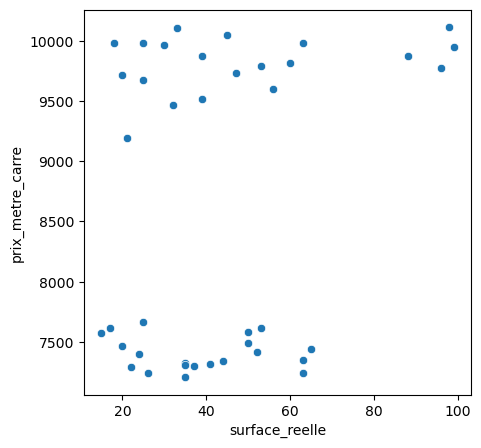

In [58]:
#Afficher un graphique en nuage de point
plt.figure(figsize = (5,5))
sns.scatterplot(data = clustering_echantillon, x = 'surface_reelle', y = 'prix_metre_carre')

In [59]:
from sklearn.cluster import KMeans
#Créer les 2 clusters Kmeans et les appliquer à notre dataset à savoir les deux types de biens : appartement ou Local industriel. commercial ou assimilé

clusters_predictions= KMeans(n_clusters=2, n_init=10, random_state=0).fit_predict(clustering_echantillon_encode)

C:\Users\amfer\anaconda3\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
# On crée une colonne qui classe les biens en fonctions des 2 clusters

clustering_echantillon_encode['clusters_predictions']=clusters_predictions


In [61]:
# On vérifie les données de la prédiction
clustering_echantillon_encode.sort_values(by="surface_reelle",ascending=False)

,surface_reelle,prix_metre_carre,clusters_predictions
17,99,9949.544452,1
32,98,10113.195822,1
39,96,9771.486096,1
0,88,9871.444128,1
23,65,7437.880186,0
38,63,9983.591800,1
7,63,7348.917415,0
35,63,7239.983240,0
22,60,9815.972258,1
28,56,9597.631488,1


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [62]:
for i in clustering_echantillon_encode.index:
    
    if round(clustering_echantillon_encode.loc[i,'clusters_predictions'])==1:
        clustering_echantillon_encode.loc[i,'nature_du_bien']='Local industriel. commercial ou assimilé'
              
    else :
        clustering_echantillon_encode.loc[i,'nature_du_bien']='Appartement'
        
#On supprime la colonne clusters_predictions qui n'a plus d'utilité 
clustering_echantillon_encode.drop('clusters_predictions',axis=1,inplace=True)

#On affiche les résultats

clustering_echantillon_encode.sort_values(by="surface_reelle",ascending=False)

,surface_reelle,prix_metre_carre,nature_du_bien
17,99,9949.544452,Local industriel. commercial ou assimilé
32,98,10113.195822,Local industriel. commercial ou assimilé
39,96,9771.486096,Local industriel. commercial ou assimilé
0,88,9871.444128,Local industriel. commercial ou assimilé
23,65,7437.880186,Appartement
38,63,9983.591800,Local industriel. commercial ou assimilé
7,63,7348.917415,Appartement
35,63,7239.983240,Appartement
22,60,9815.972258,Local industriel. commercial ou assimilé
28,56,9597.631488,Local industriel. commercial ou assimilé


In [63]:
#Calculer le nombre d'appartements et locaux de l'échantillon à classer

occurrences = clustering_echantillon_encode['nature_du_bien'].value_counts()
print(occurrences)

Local industriel. commercial ou assimilé    20
Appartement                                 20
Name: nature_du_bien, dtype: int64


# Milestone 5 - Analyse et présentation des résultats

In [64]:
# Situer les centroïdes de nos données en fonction des clusters
# Afficher le prix moyen du mètre carré et la surface réelle en fonction de la nature des biens

clustering_echantillon_encode["prix_moyen_metre_carre"] =clustering_echantillon_encode["prix_metre_carre"]
clustering_echantillon_encode.groupby('nature_du_bien')[['surface_reelle', 'prix_moyen_metre_carre']].mean()

,surface_reelle,prix_moyen_metre_carre
nature_du_bien,,
Appartement,38.60,7408.775030
Local industriel. commercial ou assimilé,49.35,9806.924674


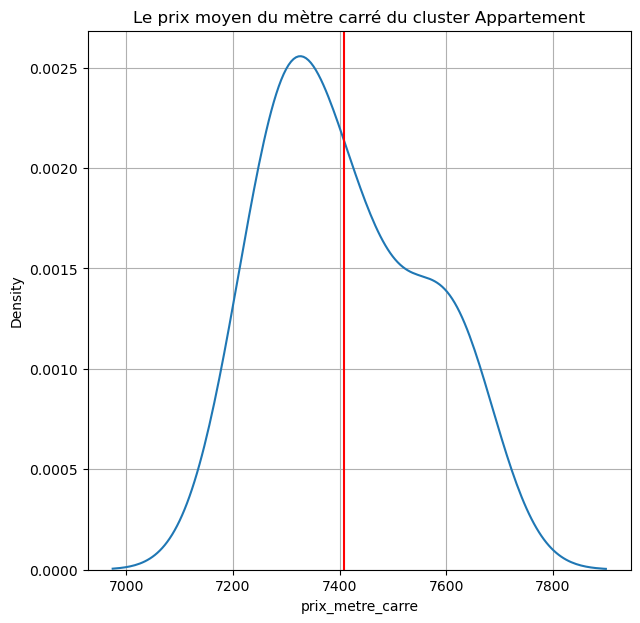

In [65]:
#Créer un visuel pour afficher le prix moyen du mètre carré du cluster "Appartement"
plt.figure(figsize=(7,7))
sns.kdeplot(data=clustering_echantillon_encode[clustering_echantillon_encode['nature_du_bien'] == 'Appartement'], x="prix_metre_carre")


# Identifier la valeur moyenne
mean_value = clustering_echantillon_encode[clustering_echantillon_encode['nature_du_bien'] == 'Appartement']['prix_metre_carre'].mean()

# Tracer une ligne pour représenter le prix moyen du mètre carré
plt.grid()
plt.axvline(x=mean_value, color='red')
plt.title('Le prix moyen du mètre carré du cluster Appartement')
plt.show()

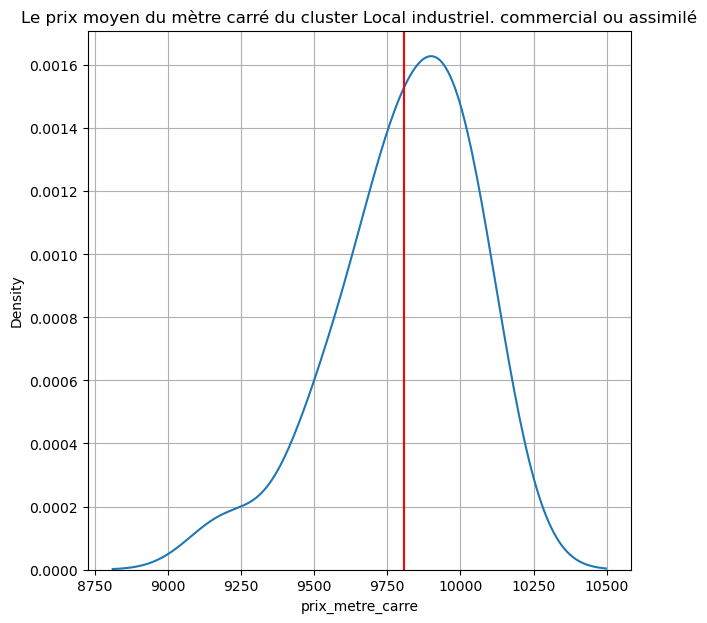

In [66]:
#Créer un visuel pour afficher le prix moyen du mètre carré du cluster "Local industriel. commercial ou assimilé"
plt.figure(figsize=(7,7))
sns.kdeplot(data=clustering_echantillon_encode[clustering_echantillon_encode['nature_du_bien'] == 'Local industriel. commercial ou assimilé'], x="prix_metre_carre")


# Identifier la valeur moyenne
mean_value = clustering_echantillon_encode[clustering_echantillon_encode['nature_du_bien'] == 'Local industriel. commercial ou assimilé']['prix_metre_carre'].mean()

# Tracer une ligne pour représenter le prix moyen du mètre carré
plt.grid()
plt.axvline(x=mean_value, color='red')
plt.title('Le prix moyen du mètre carré du cluster Local industriel. commercial ou assimilé')
plt.show()

Mes conclusions sur l'analyse et les limites de l'exercice :

•	L'échantillon à classer comprend un nombre d'appartement égal à celui des locaux.

•	La présence de deux superficies identiques dans le 19ème arrondissement ayant des prix différents porte à croire que le type de bien peut être le critère de différentiation et donc on peut poser l'hypothèse que le prix le plus élevé représente un local et le moins élevé représente un appartement.

•	Pour pondérer notre hypothèse, il y a des paramètres qui pourraient fausser nos résultats comme par exemple : dans la catégorie des assimilés on peut avoir des bureaux situés dans des quartiers peu fréquentés et nécessitant de gros travaux de rénovations alors qu'à côté pour la même superficie on a un appartement dans un quartier attractif refait à neuf offrant beaucoup de commodités ce dernier aura un prix supérieur à celui du bureau et risque d'être classé dans la catégorie Local industriel. commercial ou assimilé alors que c'est un appartement.

•	Notre algorithme de clustering possède quelques limites quand on fait face à une prise en compte de plusieurs paramètres qui complexifie les calculs. Il sera donc plus compliqué de faire ressortir des groupes homogènes et biens distincts sans qu'ils ne se chevauchent.
